In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import statistics

In [168]:
features = pd.read_csv('features.csv')

In [169]:
stores = pd.read_csv('stores.csv')

In [170]:
train = pd.read_csv('train.csv')

In [171]:
#to begin with, combine 3 dataset into 1 for training purpose
data = train.merge(features, on=['Store', 'Date'], how='inner').merge(stores, on=['Store'], how='inner')

In [172]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,A,151315


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [174]:
#initial findings: MD has many null values and we need to convert Date to datetime format

In [175]:
# Transform the date into year, month, week, day for monthly/weekly sales analysis
from datetime import date
import datetime
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week
data['Day'] = data['Date'].dt.day
data.head()

/var/folders/m_/f_txchcs4b580hs67jh00flh0000gn/T/ipykernel_947/3347646476.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.57,NaN,NaN,NaN,...,NaN,211.10,8.11,False,A,151315,2010,2,5,5
1,1,2,2010-02-05,50605.27,False,42.31,2.57,NaN,NaN,NaN,...,NaN,211.10,8.11,False,A,151315,2010,2,5,5
2,1,3,2010-02-05,13740.12,False,42.31,2.57,NaN,NaN,NaN,...,NaN,211.10,8.11,False,A,151315,2010,2,5,5
3,1,4,2010-02-05,39954.04,False,42.31,2.57,NaN,NaN,NaN,...,NaN,211.10,8.11,False,A,151315,2010,2,5,5
4,1,5,2010-02-05,32229.38,False,42.31,2.57,NaN,NaN,NaN,...,NaN,211.10,8.11,False,A,151315,2010,2,5,5


## Missing values

In [176]:
round(data.isnull().sum()/len(data)*100,2)

Store           0.00
Dept            0.00
Date            0.00
Weekly_Sales    0.00
IsHoliday_x     0.00
Temperature     0.00
Fuel_Price      0.00
MarkDown1      64.26
MarkDown2      73.61
MarkDown3      67.48
MarkDown4      67.98
MarkDown5      64.08
CPI             0.00
Unemployment    0.00
IsHoliday_y     0.00
Type            0.00
Size            0.00
Year            0.00
Month           0.00
Week            0.00
Day             0.00
dtype: float64

In [177]:
features = features.fillna(0)
features['MD'] = features['MarkDown1']+features['MarkDown2']+features['MarkDown3']+features['MarkDown4']+features['MarkDown5']
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,MD
0,1,2010-02-05,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,False,0.00
1,1,2010-02-12,38.51,2.55,0.00,0.00,0.00,0.00,0.00,211.24,8.11,True,0.00
2,1,2010-02-19,39.93,2.51,0.00,0.00,0.00,0.00,0.00,211.29,8.11,False,0.00
3,1,2010-02-26,46.63,2.56,0.00,0.00,0.00,0.00,0.00,211.32,8.11,False,0.00
4,1,2010-03-05,46.50,2.62,0.00,0.00,0.00,0.00,0.00,211.35,8.11,False,0.00


In [178]:
#Create a dataframe of total MarkDown by week
md = features.groupby('Date').MD.sum()
md = md.to_frame()
md = md[md['MD']>0]
md = md.reset_index()
md['Date'] = pd.to_datetime(md['Date'])

In [179]:
#Create a dataframe of weekly sales
wk_sales = data.groupby('Date')['Weekly_Sales'].sum()
wk_sales = wk_sales.to_frame()
wk_sales = wk_sales.reset_index()

In [180]:
#Check the MarkDown % of weekly sales
check = md.merge(wk_sales, on=['Date'], how='inner')
check.MD.sum()/check.Weekly_Sales.sum()*100

1.6464342829372365

In [181]:
#Since weekly MarkDown is only 1.6% of weekly sales, with such high missing values %, we drop all MarkDown columns

In [182]:
#Drop all MarkDown columns from train data set (data) as there are 60-70% of missing values
data.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

In [183]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.57,211.10,8.11,False,A,151315,2010,2,5,5
1,1,2,2010-02-05,50605.27,False,42.31,2.57,211.10,8.11,False,A,151315,2010,2,5,5
2,1,3,2010-02-05,13740.12,False,42.31,2.57,211.10,8.11,False,A,151315,2010,2,5,5
3,1,4,2010-02-05,39954.04,False,42.31,2.57,211.10,8.11,False,A,151315,2010,2,5,5
4,1,5,2010-02-05,32229.38,False,42.31,2.57,211.10,8.11,False,A,151315,2010,2,5,5


In [184]:
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
Year            0
Month           0
Week            0
Day             0
dtype: int64

In [185]:
#All missing values are cleared in the train data set

## Exploratory data analysis

In [186]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,Day
count,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00
mean,22.20,44.26,15981.26,60.09,3.36,171.20,7.96,136727.92,2010.97,6.45,25.83,15.67
std,12.79,30.49,22711.18,18.45,0.46,39.16,1.86,60980.58,0.80,3.24,14.15,8.75
min,1.00,1.00,-4988.94,-2.06,2.47,126.06,3.88,34875.00,2010.00,1.00,1.00,1.00
25%,11.00,18.00,2079.65,46.68,2.93,132.02,6.89,93638.00,2010.00,4.00,14.00,8.00
50%,22.00,37.00,7612.03,62.09,3.45,182.32,7.87,140167.00,2011.00,6.00,26.00,16.00
75%,33.00,74.00,20205.85,74.28,3.74,212.42,8.57,202505.00,2012.00,9.00,38.00,23.00
max,45.00,99.00,693099.36,100.14,4.47,227.23,14.31,219622.00,2012.00,12.00,52.00,31.00


Text(0.5, 1.0, 'Correlation Matrix')

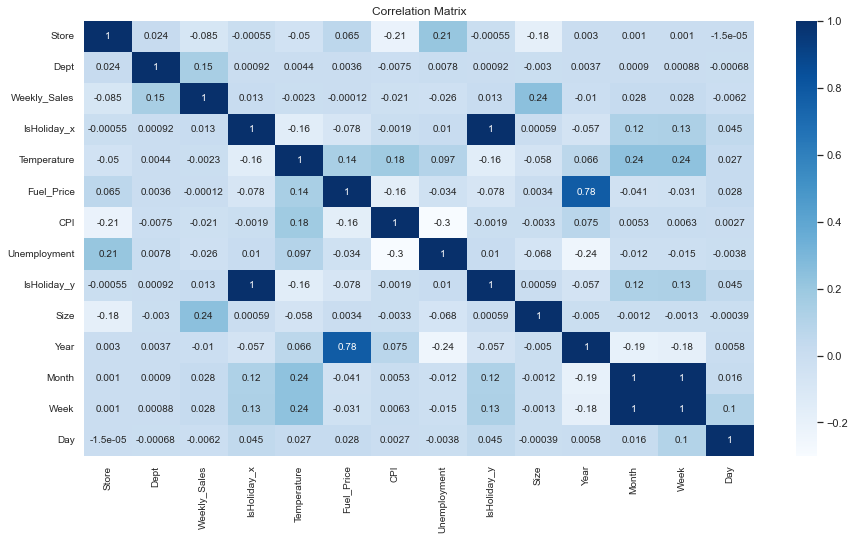

In [187]:
plt.figure(figsize=(15,8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

sns.heatmap(data.corr(), cmap='Blues', annot=True, annot_kws={'size':10})
plt.title('Correlation Matrix')

In [188]:
##Size and Dept are more positively corr. to weekly sales
#for the other variables, most are weakly correlated, so the focus of the exploratory analysis would be on size and dept
#Store type is missing here as it is not numerical categorized, will look into it in EDA

### Q1. How was the sales going by year?

Text(0.5, 1.0, 'Weekly sales by year')

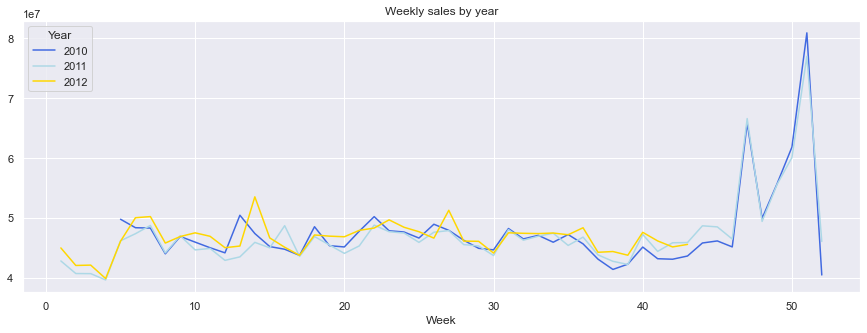

In [189]:
plt.style.use('seaborn-muted')
data.groupby(['Week','Year'])['Weekly_Sales'].sum().unstack().plot.line(figsize=(15,5),color=['royalblue','lightblue','gold'])
plt.title('Weekly sales by year')

Text(0.5, 1.0, 'Weekly sales by year')

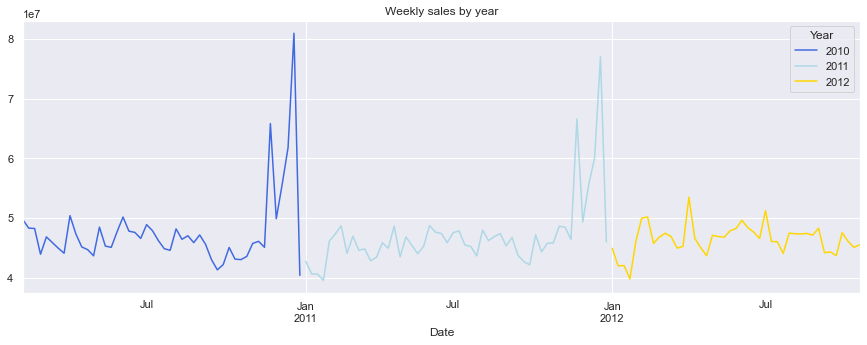

In [190]:

data.groupby(['Date','Year'])['Weekly_Sales'].sum().unstack().plot.line(figsize=(15,5),color=['royalblue','lightblue','gold'])
plt.title('Weekly sales by year')

### Q2. What is the average weekly sales? peak and trough?

In [191]:
data.groupby('Date').Weekly_Sales.sum().describe()

count        143.00
mean    47113419.49
std      5444206.20
min     39599852.99
25%     44880587.54
50%     46243899.58
75%     47792024.64
max     80931415.60
Name: Weekly_Sales, dtype: float64

In [192]:
#The sales trend by year was very similar with no obivous up/down trend between years
#Peak is seen at Xmas ($81M) while trough is at the beginning of the year ($4M), so the gap is a double
#However, 2011 Christmas shows a more significant drop vs 2010, try to look into it by dept

#Common spikes of 3 years are seen at holidays:
#1 (wk 6): Super Bowl
#2 (wk 36): Labor Day (slightly obvious only)
#3 (wk 47): Thanksgiving (2nd most important)
#4 (wk 51): Christmas (most important)

### Q3. What is the impact of holidays?

In [193]:
l_holidays = [6,36,47,51]
nh_2010 = data[(data['Year']==2010) & (data['Week'].isin(l_holidays)==False)]
nh_2011 = data[(data['Year']==2011) & (data['Week'].isin(l_holidays)==False)]
nh_2012 = data[(data['Year']==2012) & (data['Week'].isin(l_holidays)==False)]

In [194]:
mean2010=(nh_2010.groupby('Date').Weekly_Sales.sum().describe())[1]
mean2011=(nh_2011.groupby('Date').Weekly_Sales.sum().describe())[1]
mean2012=(nh_2012.groupby('Date').Weekly_Sales.sum().describe())[1]
print(mean2010,mean2011,mean2012)

46549150.59318182 46052265.42624999 46385204.68585365


### Super Bowl and Labor Day

In [195]:
def impact(w):
    df2010 = data[(data['Year']==2010) & (data['Week']==w)]
    df2011 = data[(data['Year']==2011) & (data['Week']==w)]
    df2012 = data[(data['Year']==2012) & (data['Week']==w)]
    i2010 = (df2010.groupby('Date').Weekly_Sales.sum()/mean2010)[0]
    i2011 = (df2011.groupby('Date').Weekly_Sales.sum()/mean2011)[0]
    i2012 = (df2012.groupby('Date').Weekly_Sales.sum()/mean2012)[0]
    i_list = [i2010,i2011,i2012]
    print(i_list)
    return(round(statistics.mean(i_list),2))

In [196]:
print('Super Bowl: ',impact(6))
print('Labor: ',impact(36))

[1.0384008518746206, 1.0278797872779168, 1.0781327420821243]
Super Bowl:  1.05
[0.9803486692769899, 1.015438156997696, 1.041928339808307]
Labor:  1.01


In [197]:
##Though we see a spike, the general impact of these two holidays is relatively small

### Thanksgiving and Christmas

In [198]:
def impact(w):
    df2010 = data[(data['Year']==2010) & (data['Week']==w)]
    df2011 = data[(data['Year']==2011) & (data['Week']==w)]
#    df2012 = data[(data['Year']==2012) & (data['Week']==w)]
    i2010 = (df2010.groupby('Date').Weekly_Sales.sum()/mean2010)[0]
    i2011 = (df2011.groupby('Date').Weekly_Sales.sum()/mean2011)[0]
#    i2012 = (df2012.groupby('Date').Weekly_Sales.sum()/mean2012)[0]
    i_list = [i2010,i2011]#,i2012]
    print(i_list)
    return(round(statistics.mean(i_list),2))

In [199]:
print('Thanksgiving: ',impact(47))
print('Christmas: ',impact(51))

[1.4140108337366952, 1.4460440684866147]
Thanksgiving:  1.43
[1.738622822729965, 1.6719751047493676]
Christmas:  1.71


### Easter

In [200]:
#2010: wk 13
#2011: wk 16
#2012: wk 14

In [201]:
def impact(w,x,y):
    df2010 = data[(data['Year']==2010) & (data['Week']==w)]
    df2011 = data[(data['Year']==2011) & (data['Week']==x)]
    df2012 = data[(data['Year']==2012) & (data['Week']==y)]
    i2010 = (df2010.groupby('Date').Weekly_Sales.sum()/mean2010)[0]
    i2011 = (df2011.groupby('Date').Weekly_Sales.sum()/mean2011)[0]
    i2012 = (df2012.groupby('Date').Weekly_Sales.sum()/mean2012)[0]
    i_list = [i2010,i2011,i2012]
    print(i_list)
    return(round(statistics.mean(i_list),2))

In [202]:
print('Easter: ',impact(13,16,14))

[1.083238482710052, 1.056988002858467, 1.1534349418601766]
Easter:  1.1


In [203]:
#While we see the impact of Super Bowl and Labor Day is relatively smaller, Easter impact is actually larger
#Index = 1.1, might suggest budget allocation shift from those 2 holidays to Easter, or even below 2 timing:
#Two other peaks seem to become more apparent: Early June and July, Independence Day for July?

### Q4. What are the selling depts?

In [204]:
#Total sales, total stores, total weeks

<AxesSubplot:xlabel='Dept'>

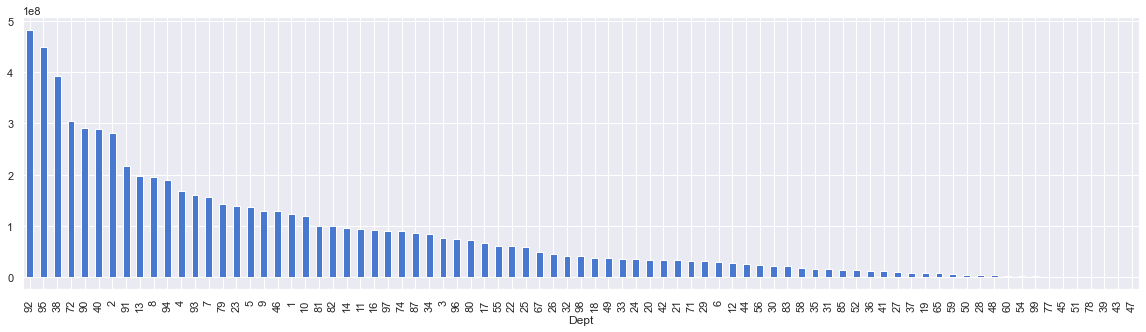

In [205]:
data.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(20,5))

### Top 10 depts

In [206]:
(round(data.groupby('Dept')['Weekly_Sales'].sum()/data.Weekly_Sales.sum()*100,1)).sort_values(ascending=False)[:10]

Dept
92   7.20
95   6.70
38   5.80
72   4.50
40   4.30
90   4.30
2    4.20
91   3.20
8    2.90
13   2.90
Name: Weekly_Sales, dtype: float64

In [207]:
#Total 81 depts, the above 10 depts accounted for roughly 50% total sales from 2010 to 2012
#Major sales came from dept starting with '9', 4 depts accounting for 20%

### Q.5 What is the average weekly sales by dept?

In [208]:
dept_wk_sales = data.groupby(['Dept','Date']).Weekly_Sales.sum().unstack()
dept_wk_sales['avg by dept'] = [dept_wk_sales.iloc[r,:].mean() for r in range(len(dept_wk_sales))]
dept_wk_sales.head()

Date,2010-02-05 00:00:00,2010-02-12 00:00:00,2010-02-19 00:00:00,2010-02-26 00:00:00,2010-03-05 00:00:00,2010-03-12 00:00:00,2010-03-19 00:00:00,2010-03-26 00:00:00,2010-04-02 00:00:00,2010-04-09 00:00:00,...,2012-08-31 00:00:00,2012-09-07 00:00:00,2012-09-14 00:00:00,2012-09-21 00:00:00,2012-09-28 00:00:00,2012-10-05 00:00:00,2012-10-12 00:00:00,2012-10-19 00:00:00,2012-10-26 00:00:00,avg by dept
Dept,,,,,,,,,,,,,,,,,,,,,
1,881833.41,1457182.40,1118257.36,681391.58,762652.57,803886.93,846686.47,1045724.42,2451952.54,1518946.82,...,649190.54,700311.48,727323.11,740105.84,754344.66,855362.83,936707.78,1037182.46,1295180.09,864606.83
2,1997831.89,1839217.77,1961685.93,1859531.58,1957870.82,1908498.17,1848039.78,1826143.30,1957167.66,1903127.59,...,2086129.21,2076768.16,1896324.58,1891218.64,1871196.15,1988021.85,1854886.45,1879765.40,1871912.15,1962315.91
3,484368.90,429341.02,410399.14,415060.22,422680.37,402600.04,371295.10,366453.52,394383.53,363798.86,...,1645308.80,1024883.43,562621.87,409312.09,374436.87,376950.71,350316.41,348305.68,348032.25,530716.43
4,1205801.77,1075081.62,1113781.74,1075834.39,1145506.25,1083931.40,1064848.12,1059748.84,1159243.85,1118048.30,...,1245850.80,1291517.23,1140553.42,1131506.47,1104026.27,1207399.66,1136651.53,1131269.31,1151035.43,1168858.36
5,1116952.54,1148132.32,1110717.47,855568.94,930687.44,1086789.71,1063601.82,1597422.35,1455216.22,966470.35,...,711079.39,657423.35,689356.54,716140.77,966922.55,865522.70,792464.82,879453.35,884644.81,948303.21


In [209]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dept_wk_sales['avg by dept'].describe()

count        81.00
mean     581676.89
std      724058.85
min         -35.96
25%       84524.03
50%      278523.91
75%      824457.26
max     3384219.17
Name: avg by dept, dtype: float64

### Top 10 depts average weekly sales 

In [210]:
dept_wk_sales.iloc[:,-1].sort_values(ascending=False).head(10)

Dept
92   3384219.17
95   3142099.04
38   2749077.88
72   2137938.13
90   2035443.80
40   2020531.62
2    1962315.91
91   1515955.98
13   1379871.12
8    1358606.86
Name: avg by dept, dtype: float64

### Q.6 How are the top 10 depts performing along the year?

<AxesSubplot:xlabel='Date'>

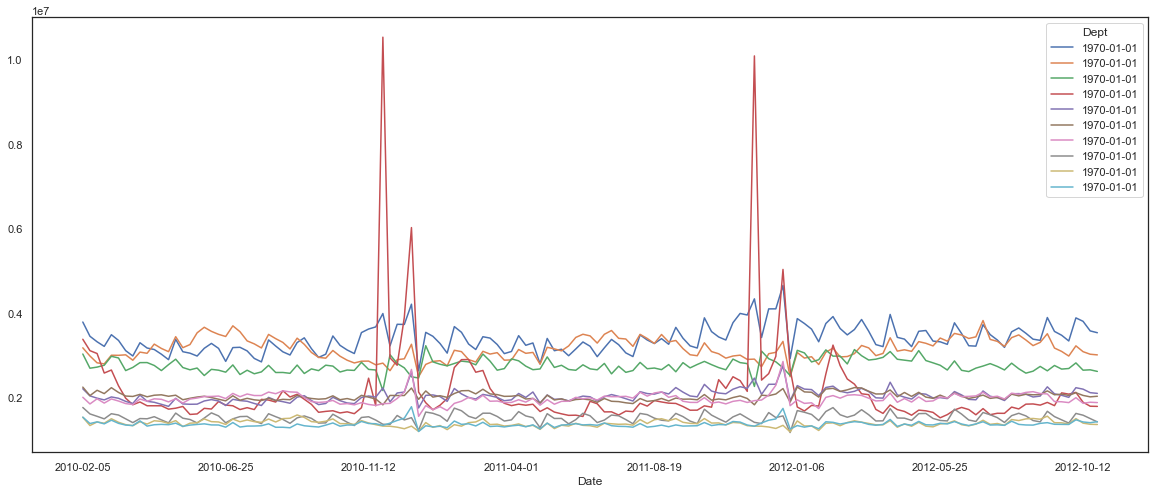

In [360]:
dept_wk_sales['tot by dept'] = [dept_wk_sales.iloc[r,:-2].sum() for r in range(len(dept_wk_sales))]
top10 = dept_wk_sales.sort_values(by='tot by dept',ascending=False).head(10)
top10 = top10.drop(columns=['avg by dept','tot by dept'])

current_format = '%Y-%m-%d %H:%M:%S'
desired_format = "%Y-%m-%d"
top10.columns = pd.to_datetime(top10.columns).strftime(desired_format)
top10.columns = pd.to_datetime(top10.columns, infer_datetime_format=current_format).strftime(desired_format)
top10.index = pd.to_datetime(top10.index,infer_datetime_format=current_format).strftime(desired_format)
top10.transpose().plot(figsize=(20,8),grid=False)

### Q.7 What are the key drivers during Thanksgiving and Christmas?

In [212]:
tg2010 = dept_wk_sales.iloc[:,42]
tg2011 = dept_wk_sales.iloc[:,94]
xmas2010 = dept_wk_sales.iloc[:,46]
xmas2011 = dept_wk_sales.iloc[:,98]
n_tg_xm = dept_wk_sales.drop(columns=[dept_wk_sales.columns[42],dept_wk_sales.columns[94],dept_wk_sales.columns[46],dept_wk_sales.columns[98],'avg by dept'])

In [213]:
n_tg_xm['avg by dept'] = [n_tg_xm.iloc[r,:].mean() for r in range(len(n_tg_xm))]
n_tg_xm.head()

Date,2010-02-05 00:00:00,2010-02-12 00:00:00,2010-02-19 00:00:00,2010-02-26 00:00:00,2010-03-05 00:00:00,2010-03-12 00:00:00,2010-03-19 00:00:00,2010-03-26 00:00:00,2010-04-02 00:00:00,2010-04-09 00:00:00,...,2012-09-07 00:00:00,2012-09-14 00:00:00,2012-09-21 00:00:00,2012-09-28 00:00:00,2012-10-05 00:00:00,2012-10-12 00:00:00,2012-10-19 00:00:00,2012-10-26 00:00:00,tot by dept,avg by dept
Dept,,,,,,,,,,,,,,,,,,,,,
1,881833.41,1457182.40,1118257.36,681391.58,762652.57,803886.93,846686.47,1045724.42,2451952.54,1518946.82,...,700311.48,727323.11,740105.84,754344.66,855362.83,936707.78,1037182.46,1295180.09,122343596.45,1714516.90
2,1997831.89,1839217.77,1961685.93,1859531.58,1957870.82,1908498.17,1848039.78,1826143.30,1957167.66,1903127.59,...,2076768.16,1896324.58,1891218.64,1871196.15,1988021.85,1854886.45,1879765.40,1871912.15,278739262.28,3929173.34
3,484368.90,429341.02,410399.14,415060.22,422680.37,402600.04,371295.10,366453.52,394383.53,363798.86,...,1024883.43,562621.87,409312.09,374436.87,376950.71,350316.41,348305.68,348032.25,75544417.70,1065885.39
4,1205801.77,1075081.62,1113781.74,1075834.39,1145506.25,1083931.40,1064848.12,1059748.84,1159243.85,1118048.30,...,1291517.23,1140553.42,1131506.47,1104026.27,1207399.66,1136651.53,1131269.31,1151035.43,165995710.15,2341115.19
5,1116952.54,1148132.32,1110717.47,855568.94,930687.44,1086789.71,1063601.82,1597422.35,1455216.22,966470.35,...,657423.35,689356.54,716140.77,966922.55,865522.70,792464.82,879453.35,884644.81,134722713.76,1834316.28


In [214]:
tg2010 = tg2010.to_frame().reset_index()
tg2011 = tg2011.to_frame().reset_index()
xmas2010 = xmas2010.to_frame().reset_index()
xmas2011 = xmas2011.to_frame().reset_index()
tg = tg2010.merge(tg2011, on=['Dept'], how='inner')
xmas = xmas2010.merge(xmas2011, on=['Dept'], how='inner')

In [215]:
tg.set_index('Dept',inplace=True)
tg['avg tg'] = [tg.iloc[r,:].mean() for r in range(len(tg))]

In [216]:
xmas.set_index('Dept',inplace=True)
xmas['avg xmas'] = [xmas.iloc[r,:].mean() for r in range(len(xmas))]

In [217]:
tg20 = tg.sort_values(by='avg tg',ascending=False).head(20)
xmas20 = xmas.sort_values(by='avg xmas',ascending=False).head(20)

<AxesSubplot:xlabel='Dept'>

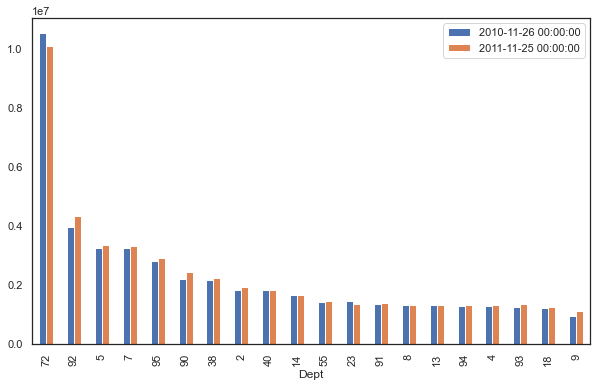

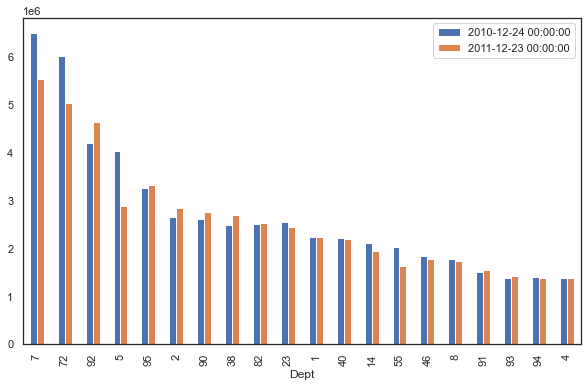

In [359]:
tg20.drop(columns='avg tg').plot.bar()
xmas20.drop(columns='avg xmas').plot.bar()

#tg20.sort_values(by='avg tg',ascending=True).drop(columns='avg tg').plot.barh()
#xmas20.sort_values(by='avg xmas',ascending=True).drop(columns='avg xmas').plot.barh()

In [219]:
n_tg_xm['avg by dept'].sort_values(ascending=False).head(20)

Dept
92   6765665.90
95   6309654.75
38   5528818.54
72   4128550.13
90   4071594.70
40   4055655.26
2    3929173.34
91   3045125.73
13   2771552.34
8    2721374.90
94   2665217.85
4    2341115.19
93   2235339.97
7    2081557.49
79   1983588.84
23   1911069.83
5    1834316.28
9    1793838.45
46   1789442.29
1    1714516.90
Name: avg by dept, dtype: float64

### Q.8 Which depts are performing? Which not?

<AxesSubplot:title={'center':'Per store weekly sales by Dept'}, xlabel='Dept', ylabel='Weekly_Sales'>

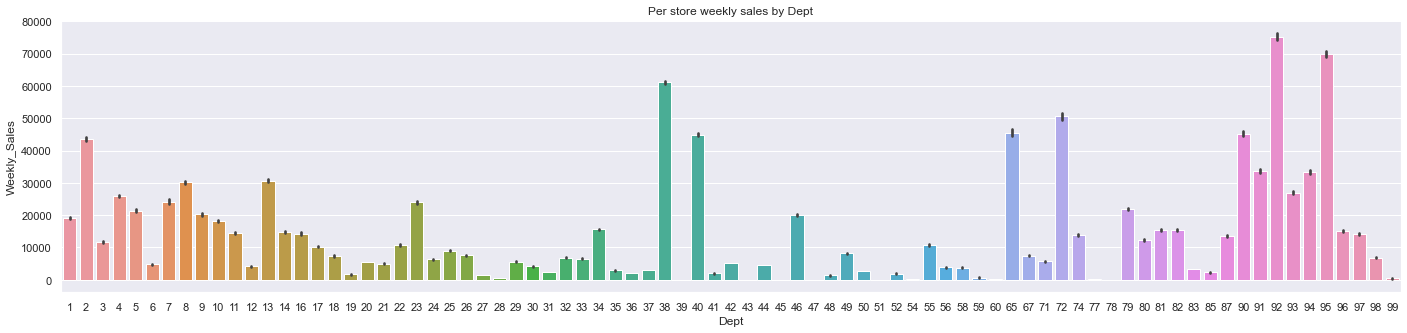

In [220]:
plt.figure(figsize=(24,5))
plt.title('Per store weekly sales by Dept')
sns.barplot(data = data, x="Dept", y="Weekly_Sales")


In [221]:
dept2010 = dept_wk_sales.iloc[:,0:48]
dept2011 = dept_wk_sales.iloc[:,49:100]
dept2012 = dept_wk_sales.iloc[:,100:-2]

In [222]:
dept2010['avg dept 2010'] = [dept2010.iloc[r,:].mean() for r in range(len(dept2010))]
dept2011['avg dept 2011'] = [dept2011.iloc[r,:].mean() for r in range(len(dept2011))]
dept2012['avg dept 2012'] = [dept2012.iloc[r,:].mean() for r in range(len(dept2012))]

/var/folders/m_/f_txchcs4b580hs67jh00flh0000gn/T/ipykernel_947/261449848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dept2010['avg dept 2010'] = [dept2010.iloc[r,:].mean() for r in range(len(dept2010))]
/var/folders/m_/f_txchcs4b580hs67jh00flh0000gn/T/ipykernel_947/261449848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dept2011['avg dept 2011'] = [dept2011.iloc[r,:].mean() for r in range(len(dept2011))]
/var/folders/m_/f_txchcs4b580hs67jh00flh0000gn/T/ipykernel_947/261449848.py:3: SettingWith

In [223]:
dept_rank = dept_wk_sales.iloc[:,-2].sort_values(ascending=False).head(20)
dept_rank = dept_rank.to_frame().reset_index()
dept2010_rank = dept2010['avg dept 2010'].to_frame().reset_index()
dept2011_rank = dept2011['avg dept 2011'].to_frame().reset_index()
dept2012_rank = dept2012['avg dept 2012'].to_frame().reset_index()
d_rank = dept_rank.merge(dept2010_rank, on=['Dept'], how='inner').merge(dept2011_rank, on=['Dept'], how='inner').merge(dept2012_rank, on=['Dept'], how='inner')

Text(0.5, 1.0, 'Top 20 depts average weekly sales by year')

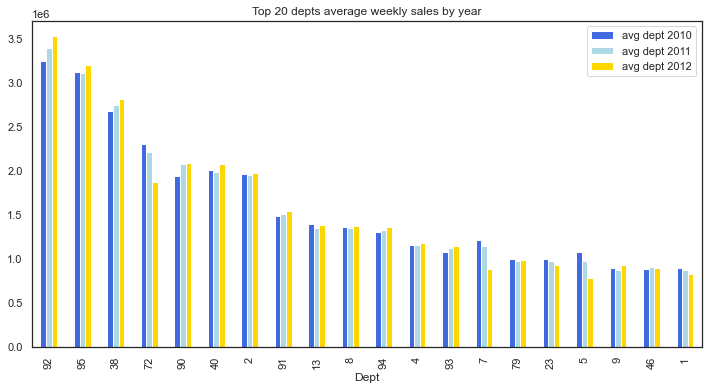

In [355]:
d_rank.set_index('Dept').drop(columns='avg by dept').plot.bar(figsize=(12,6),color=['royalblue','lightblue','gold'], grid=False)
plt.title('Top 20 depts average weekly sales by year')

### Q.9  What are the top 10 performing stores?

<AxesSubplot:xlabel='Store'>

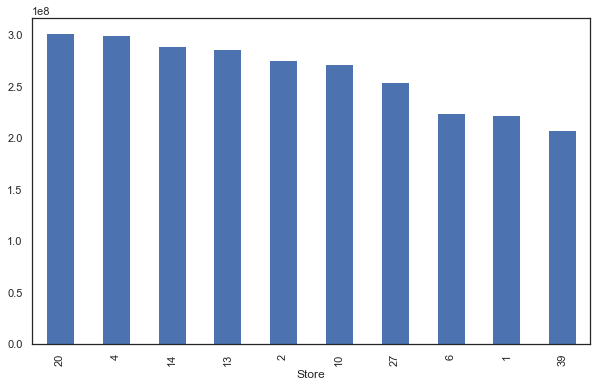

In [362]:
data.groupby('Store').Weekly_Sales.sum().sort_values(ascending=False).head(10).plot.bar()

In [226]:
(data.groupby('Store').Weekly_Sales.sum()/data.Weekly_Sales.sum()*100).sort_values(ascending=False).head(10)

Store
20   4.47
4    4.45
14   4.29
13   4.25
2    4.09
10   4.03
27   3.77
6    3.32
1    3.30
39   3.08
Name: Weekly_Sales, dtype: float64

In [363]:
df_typeA = data[data['Type']=='A']
df_typeB = data[data['Type']=='B']
df_typeC = data[data['Type']=='C']

/var/folders/m_/f_txchcs4b580hs67jh00flh0000gn/T/ipykernel_947/2195474078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_typeA['year'] = pd.to_datetime(df_typeA['Date']).dt.year


Text(0.5, 1.0, 'Type A Stores Weekly_Sales across different stores')

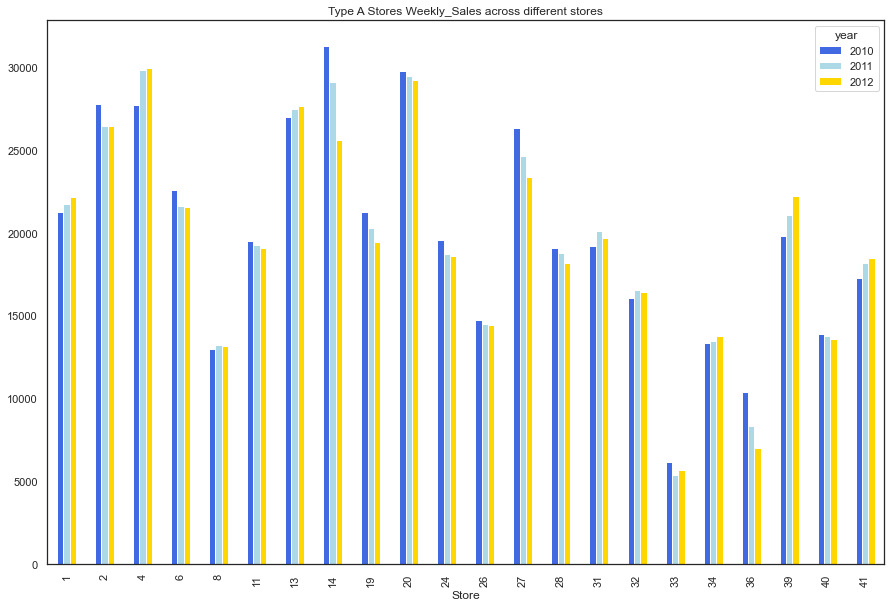

In [373]:
df_typeA['year'] = pd.to_datetime(df_typeA['Date']).dt.year
df_typeA.groupby(['Store','year'])['Weekly_Sales'].mean().sort_values(ascending=False).unstack().plot(kind='bar',figsize=(15,10),color=['royalblue','lightblue','gold'])
plt.title('Type A Stores Weekly_Sales across different stores')

/var/folders/m_/f_txchcs4b580hs67jh00flh0000gn/T/ipykernel_947/249733342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_typeB['year'] = pd.to_datetime(df_typeB['Date']).dt.year


Text(0.5, 1.0, 'Type B Stores Weekly_Sales across different stores')

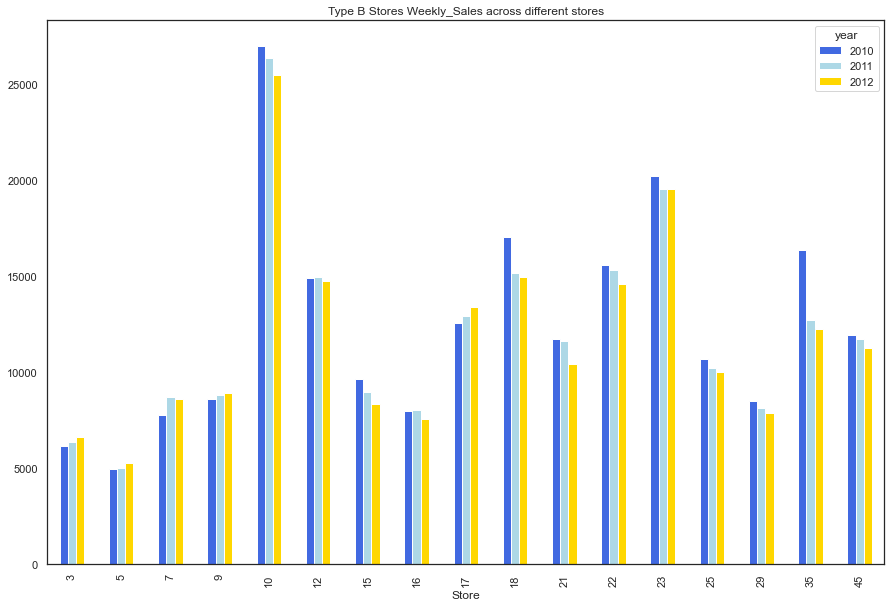

In [375]:
df_typeB['year'] = pd.to_datetime(df_typeB['Date']).dt.year
df_typeB.groupby(['Store','year'])['Weekly_Sales'].mean().sort_values(ascending=False).unstack().plot(kind='bar',figsize=(15,10),color=['royalblue','lightblue','gold'])
plt.title('Type B Stores Weekly_Sales across different stores')

/var/folders/m_/f_txchcs4b580hs67jh00flh0000gn/T/ipykernel_947/3251111411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_typeC['year'] = pd.to_datetime(df_typeC['Date']).dt.year


Text(0.5, 1.0, 'Type C Stores Weekly_Sales across different stores')

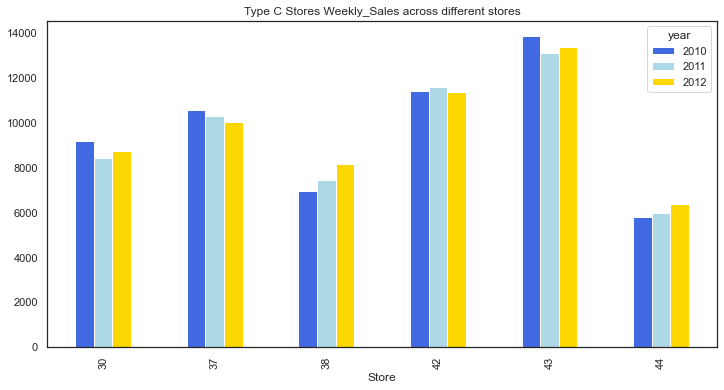

In [377]:
df_typeC['year'] = pd.to_datetime(df_typeC['Date']).dt.year
df_typeC.groupby(['Store','year'])['Weekly_Sales'].mean().sort_values(ascending=False).unstack().plot(kind='bar',figsize=(12,6),color=['royalblue','lightblue','gold'])
plt.title('Type C Stores Weekly_Sales across different stores')

### Q.10 What are the store characteristics or importance to the key depts?

Text(0.5, 1.0, 'Heatmap by dept by store')

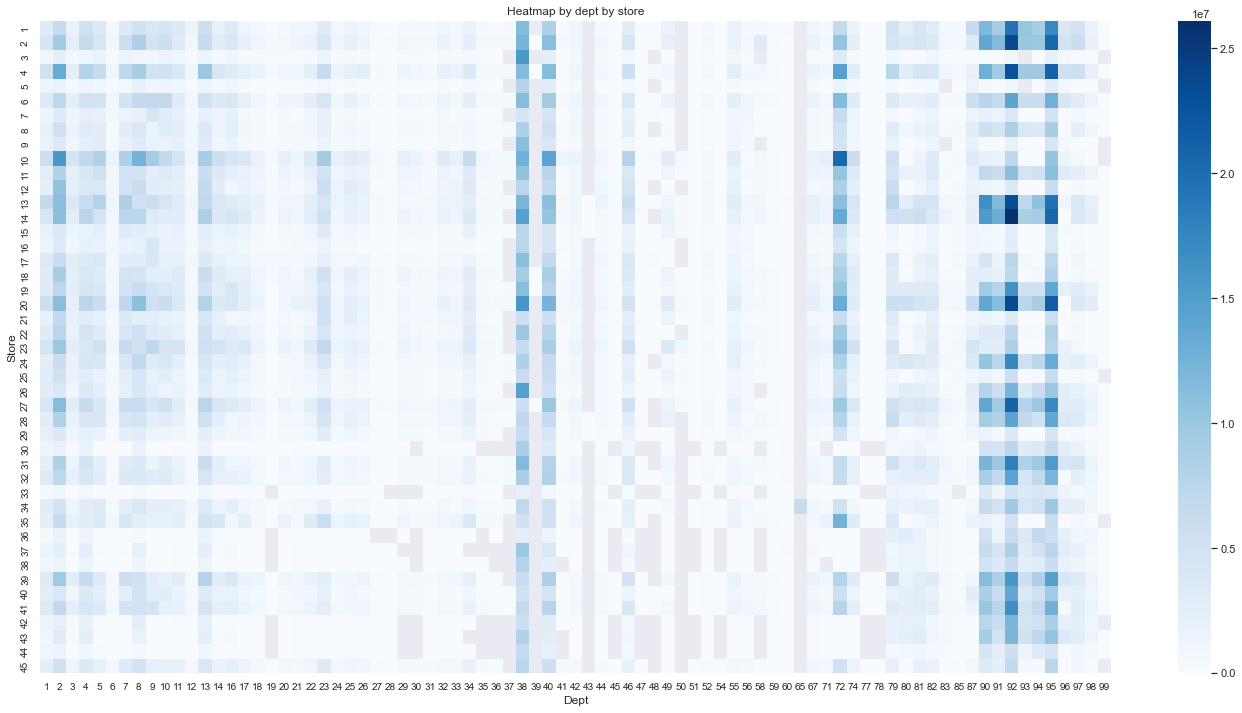

In [227]:
st_dept = data.groupby(['Store','Dept']).Weekly_Sales.sum().unstack()
plt.figure(figsize=(24,12))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

sns.heatmap(st_dept, cmap='Blues', annot=False)
plt.title('Heatmap by dept by store')
#by changing cmap to 'bwr', we can identify which stores could not sell core depts 

In [228]:
#Store 10 is obviously an important store during thanksgiving and christmas!

Text(0.5, 1.0, 'Heatmap by store by dept')

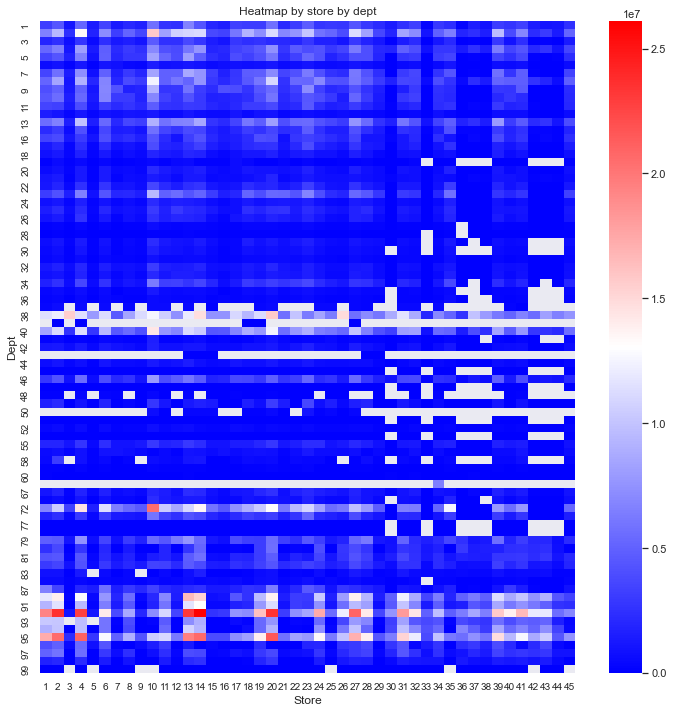

In [229]:
plt.figure(figsize=(12,12))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

sns.heatmap(st_dept.transpose(), cmap='bwr', annot=False)
plt.title('Heatmap by store by dept')
#transpose depends on the viewer's role: merchandising or operations/store managers

### Q.11 What is the split by store type?

In [230]:
store_by_wk = data.groupby(['Store','Date']).Weekly_Sales.sum().unstack()
store_by_wk['avg'] = [store_by_wk.iloc[r,:].mean() for r in range(len(store_by_wk))]
sales = store_by_wk['avg']
size = data.groupby(['Store','Type']).Size.mean()

sales = sales.to_frame().reset_index()
size = size.to_frame().reset_index()
s = size.merge(sales, on=['Store'], how='inner')
s.set_index('Store').head()

,Type,Size,avg
Store,,,
1,A,151315.00,1555264.40
2,A,202307.00,1925751.34
3,B,37392.00,402704.44
4,A,205863.00,2094712.96
5,B,34875.00,318011.81


In [328]:
#Average weekly sales by store type
s.groupby('Type').avg.describe().transpose()

Type,A,B,C
count,22.00,17.00,6.00
mean,1376673.47,822994.96,472614.83
std,507385.96,390897.04,120459.24
min,259861.69,318011.81,302748.87
25%,1043825.92,543980.55,398943.64
50%,1376328.42,756069.08,478739.95
75%,1722594.20,1009001.61,547027.97
max,2107676.87,1899424.57,633324.72


In [331]:
#Average size by store type
s.groupby('Type').Size.describe().transpose()

Type,A,B,C
count,22.00,17.00,6.00
mean,177247.73,101190.71,40541.67
std,49392.62,32371.14,1304.15
min,39690.00,34875.00,39690.00
25%,155840.75,93188.00,39745.00
50%,202406.00,114533.00,39910.00
75%,203819.00,123737.00,40774.00
max,219622.00,140167.00,42988.00


In [333]:
#Sales per size unit by type of stores, the lower the value, the lower the sales efficiency
#Walmart could compute the area/dept and sales/dept to get the sales efficiency of the dept
s.groupby('Type').avg.mean()/s.groupby('Type').Size.mean()

Type
A    7.77
B    8.13
C   11.66
dtype: float64

Text(0.5, 1.0, 'Number of stores by store type')

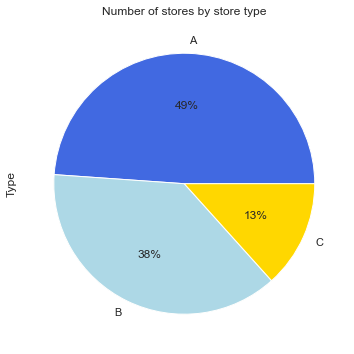

In [234]:
s.Type.value_counts().plot.pie(figsize=(8,6))
colors = ['royalblue','lightblue','gold']
plt.pie(s.Type.value_counts(),colors=colors,autopct='%.0f%%')
plt.title('Number of stores by store type')

Text(0.5, 1.0, 'Total weekly sales by store type')

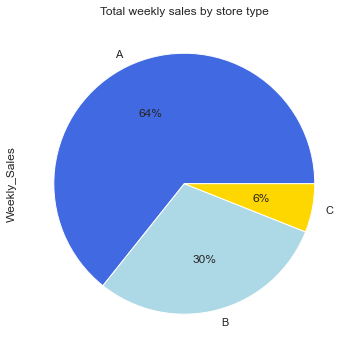

In [235]:
data.groupby('Type').Weekly_Sales.sum().plot.pie(figsize=(8,6))
colors = ['royalblue','lightblue','gold']
plt.pie(data.groupby('Type').Weekly_Sales.sum(),colors=colors,autopct='%.0f%%')
plt.title('Total weekly sales by store type')

### Q.12 What are the characteristics by store type?

Text(0.5, 1.0, 'Weekly sales by store size and type')

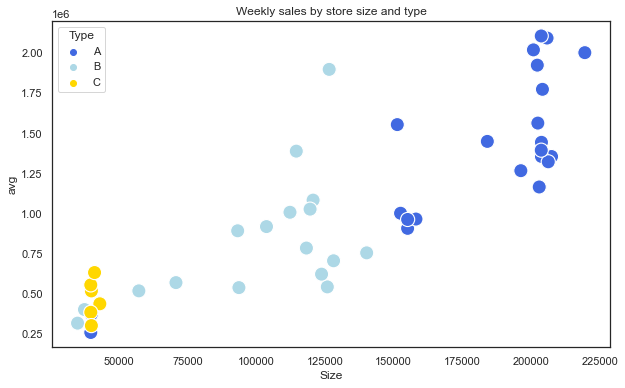

In [236]:
sns.set_style("white")
sns.scatterplot(data=s, x='Size', y='avg', hue='Type',palette=['royalblue','lightblue','gold'],s=200)
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Weekly sales by store size and type')

In [237]:
#A: larger size, higher sales
#B: size and sales in the middle
#C: smaller size, lower sales

<AxesSubplot:xlabel='Date'>

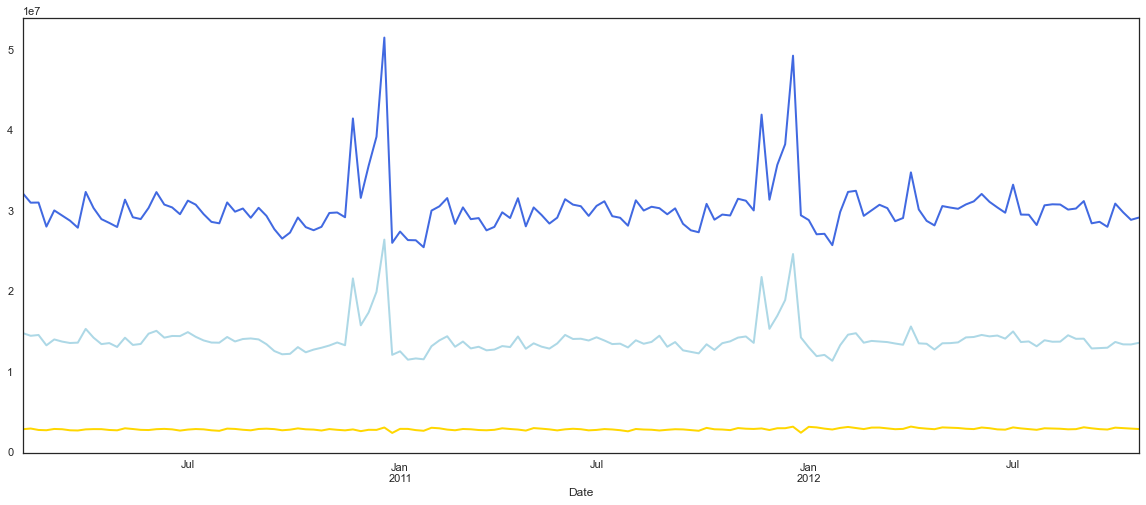

In [352]:
fig, ax = plt.subplots(figsize=(20,8))

data[data['Type']=='A'].groupby('Date')['Weekly_Sales'].sum().plot(c='royalblue',linewidth = 2)
data[data['Type']=='B'].groupby('Date')['Weekly_Sales'].sum().plot(c='lightblue',linewidth = 2)
data[data['Type']=='C'].groupby('Date')['Weekly_Sales'].sum().plot(c='gold',linewidth = 2)

## Train/test data split

In [238]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.57,211.10,8.11,False,A,151315,2010,2,5,5
1,1,2,2010-02-05,50605.27,False,42.31,2.57,211.10,8.11,False,A,151315,2010,2,5,5
2,1,3,2010-02-05,13740.12,False,42.31,2.57,211.10,8.11,False,A,151315,2010,2,5,5
3,1,4,2010-02-05,39954.04,False,42.31,2.57,211.10,8.11,False,A,151315,2010,2,5,5
4,1,5,2010-02-05,32229.38,False,42.31,2.57,211.10,8.11,False,A,151315,2010,2,5,5


In [239]:
data['IsHoliday_x'] = [1 if x == True else 0 for x in data['IsHoliday_x']]

In [240]:
data = data.drop(columns=['IsHoliday_y','Day'])

In [241]:
data_dummies=pd.get_dummies(data,drop_first=True)

In [242]:
data_dummies.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,42.31,2.57,211.10,8.11,151315,2010,2,5,0,0
1,1,2,2010-02-05,50605.27,0,42.31,2.57,211.10,8.11,151315,2010,2,5,0,0
2,1,3,2010-02-05,13740.12,0,42.31,2.57,211.10,8.11,151315,2010,2,5,0,0
3,1,4,2010-02-05,39954.04,0,42.31,2.57,211.10,8.11,151315,2010,2,5,0,0
4,1,5,2010-02-05,32229.38,0,42.31,2.57,211.10,8.11,151315,2010,2,5,0,0


In [243]:
X = data_dummies.drop(columns=['Weekly_Sales','Date'])
y = data_dummies['Weekly_Sales']

In [244]:
X.shape

(421570, 13)

In [245]:
y.shape

(421570,)

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [247]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

316177 105393 316177 105393


## Feature Scaling

In [248]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
np.set_printoptions(precision=5)

## Model building

## Regression Tree

In [249]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()#random_state=42
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [250]:
from sklearn.metrics import mean_squared_error, r2_score
import math

print(f"Mean squared error:{mean_squared_error(y_test, y_pred_dt): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_dt)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_dt):.2f}')

Mean squared error: 24296645.83
Root Mean squared error: 4929.16
Variance score: 0.95


## Random Forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [90]:
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_rf): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_rf)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_rf):.2f}')

Mean squared error: 12014142.60
Root Mean squared error: 3466.14
Variance score: 0.98


## XGBoost Regressor

In [136]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)

In [137]:
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_xg): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_xg)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_xg):.2f}')

Mean squared error: 26744842.55
Root Mean squared error: 5171.54
Variance score: 0.95


## Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [94]:
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_lr): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_lr)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_lr):.2f}')

Mean squared error: 480298708.90
Root Mean squared error: 21915.72
Variance score: 0.09


## Lasso Regression

In [95]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)

In [96]:
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_lasso): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_lasso)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_lasso):.2f}')

Mean squared error: 480296311.19
Root Mean squared error: 21915.66
Variance score: 0.09


## Gradient Boosting Regressor

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [98]:
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_gb): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_gb)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_gb):.2f}')

Mean squared error: 140676337.21
Root Mean squared error: 11860.71
Variance score: 0.73


## AdaBoost Regressor

In [99]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

In [100]:
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_ada): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_ada)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_ada):.2f}')

Mean squared error: 611608252.26
Root Mean squared error: 24730.71
Variance score: -0.16


## Extra Trees Regressor

In [101]:
from sklearn.ensemble import ExtraTreesRegressor
et = GradientBoostingRegressor()
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)

In [102]:
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_et): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_et)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_et):.2f}')

Mean squared error: 140676337.21
Root Mean squared error: 11860.71
Variance score: 0.73


## Feature Selection by Feature Importance of Random Forest

In [96]:
importances = rf.feature_importances_

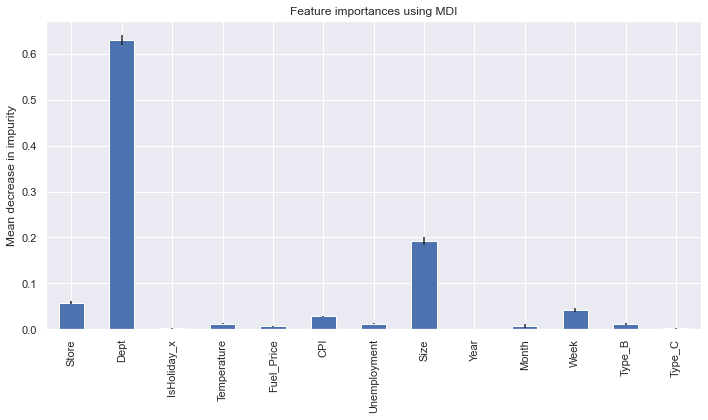

In [97]:
forest_importances = pd.Series(importances, index=X.columns)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [98]:
X1 = data_dummies.drop(columns=['Weekly_Sales','Date','IsHoliday_x','Temperature','Fuel_Price','Unemployment','Year','Month','Type_B','Type_C'])
y1 = data_dummies['Weekly_Sales']

In [99]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25)

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.fit(X1_test)
np.set_printoptions(precision=5)

In [101]:
rf_fs = RandomForestRegressor()
rf_fs.fit(X1_train, y1_train)

RandomForestRegressor()

In [102]:
y1_pred_rf_fs = rf_fs.predict(X1_test)

In [103]:
print(f"Mean squared error:{mean_squared_error(y1_test, y1_pred_rf_fs): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y1_test, y1_pred_rf_fs)) :.2f}")
print(f'Variance score: {r2_score(y1_test, y1_pred_rf_fs):.2f}')

Mean squared error: 11848059.42
Root Mean squared error: 3442.10
Variance score: 0.98


In [98]:
#The result is very close while the training time is shortened to 50s by reducing to 5 features only
#Originally it took 2.5 mins, so features selection reduced 2/3 of training time

## PCA

In [105]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [107]:
rf2 = RandomForestRegressor(random_state=0)
rf2.fit(X_train_pca, y_train)

RandomForestRegressor(random_state=0)

In [109]:
y_pred_rf2 = rf2.predict(X_test_pca)
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_rf2): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_rf2)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_rf2):.2f}')

Mean squared error: 62220379.09
Root Mean squared error: 7887.99
Variance score: 0.88


In [ ]:
#Performancing dropped after applying PCA

## Hyperparameter Optimization for Random Forest with 5 selected features

In [ ]:
#Features selected: Store, Dept, CPI, Size, Week

In [104]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [105]:
#rf_hpo = RandomForestRegressor()
#rf_random = RandomizedSearchCV(estimator = rf_hpo, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=2, random_state=0, n_jobs = -1)
#rf_random.fit(X1_train, y1_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END bootstrap=False, max_depth=70, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 2.9min
[CV] END bootstrap=False, max_depth=70, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 3.0min
[CV] END bootstrap=False, max_depth=70, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 3.0min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 8.1min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 8.1min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 8.1min


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, verbose=2)

In [113]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    print('Model Performance')
    print(f"Mean squared error:{mean_squared_error(y1_test, predictions): .2f}")
    print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y1_test, predictions)) :.2f}")
    print(f'Variance score: {r2_score(y1_test, predictions):.2f}')

### Base model test

In [129]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X1_train, y1_train)
evaluate(base_model, X1_test, y1_test)

Model Performance
Mean squared error: 12606596.02
Root Mean squared error: 3550.58
Variance score: 0.98


### Best model test

In [126]:
best_random = rf_random.best_estimator_
print(best_random)
evaluate(best_random, X1_test, y1_test)

RandomForestRegressor(bootstrap=False, max_depth=70, min_samples_leaf=2,
                      min_samples_split=10, n_estimators=200)
Model Performance
Mean squared error: 16361442.48
Root Mean squared error: 4044.93
Variance score: 0.97


In [ ]:
#Try another combination from HPO

In [110]:
rf_fs_hpo = RandomForestRegressor(bootstrap=False, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=1000)
rf_fs_hpo.fit(X1_train, y1_train)

RandomForestRegressor(bootstrap=False, max_depth=40, min_samples_split=5,
                      n_estimators=1000)

In [111]:
y1_pred_rf_fs_hpo = rf_fs_hpo.predict(X1_test)

In [112]:
print(f"Mean squared error:{mean_squared_error(y1_test, y1_pred_rf_fs_hpo): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y1_test, y1_pred_rf_fs_hpo)) :.2f}")
print(f'Variance score: {r2_score(y1_test, y1_pred_rf_fs_hpo):.2f}')

Mean squared error: 17704427.54
Root Mean squared error: 4207.66
Variance score: 0.97


### Random try manually

In [117]:
rf_fs2 = RandomForestRegressor(bootstrap=False, max_depth=70, min_samples_leaf=2, min_samples_split=10, n_estimators=10)
rf_fs2.fit(X1_train, y1_train)

RandomForestRegressor(bootstrap=False, max_depth=70, min_samples_leaf=2,
                      min_samples_split=10, n_estimators=10)

In [118]:
y1_pred_rf_fs2 = rf_fs2.predict(X1_test)

In [119]:
print(f"Mean squared error:{mean_squared_error(y1_test, y1_pred_rf_fs2): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y1_test, y1_pred_rf_fs2)) :.2f}")
print(f'Variance score: {r2_score(y1_test, y1_pred_rf_fs2):.2f}')

Mean squared error: 16360425.45
Root Mean squared error: 4044.80
Variance score: 0.97


### Last try with original data set but n-estimators = 10 for shorter training time test

In [131]:
rf10 = RandomForestRegressor(n_estimators=10, random_state=42)
rf10.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [132]:
y_pred10 = rf10.predict(X_test)

In [133]:
print(f"Mean squared error:{mean_squared_error(y_test, y_pred10): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred10)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred10):.2f}')

Mean squared error: 13739573.74
Root Mean squared error: 3706.69
Variance score: 0.97


### Conclusion: the best model is Random Forest (n-estimators=10, random_state = 42) with 5 features
lowest RMSE = 3,551, 
best variance score = 0.98, 
shortest training time: 7s

## Load Test Data

In [146]:
test = pd.read_csv('test.csv')

In [148]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [149]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [162]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [156]:
test = test.merge(stores, on=['Store'], how='outer')

In [158]:
test['Date'] = pd.to_datetime(test['Date'])
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Week'] = test['Date'].dt.week

/var/folders/m_/f_txchcs4b580hs67jh00flh0000gn/T/ipykernel_947/1686444714.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test['Week'] = test['Date'].dt.week


In [160]:
test.drop(columns=['Date','IsHoliday','Type','Year','Month'],inplace=True)

In [251]:
test

,Store,Dept,Size,Week
0,1,1,151315,44
1,1,1,151315,45
2,1,1,151315,46
3,1,1,151315,47
4,1,1,151315,48
...,...,...,...,...
115059,45,98,118221,26
115060,45,98,118221,27
115061,45,98,118221,28
115062,45,98,118221,29


In [256]:
Xf = X1.copy()
Xf.drop(columns='CPI',inplace=True)
Xf

,Store,Dept,Size,Week
0,1,1,151315,5
1,1,2,151315,5
2,1,3,151315,5
3,1,4,151315,5
4,1,5,151315,5
...,...,...,...,...
421565,45,93,118221,43
421566,45,94,118221,43
421567,45,95,118221,43
421568,45,97,118221,43


In [257]:
yf = y1.copy()
yf.shape

(421570,)

In [258]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xf = scaler.fit_transform(Xf)
test = scaler.transform(test)
np.set_printoptions(precision=5)

## Final training

In [259]:
rf_final = RandomForestRegressor(n_estimators=10, random_state=42)
rf_final.fit(Xf, yf)

RandomForestRegressor(n_estimators=10, random_state=42)

## Final Prediction

In [262]:
y_pred_f = rf_final.predict(test)

In [263]:
y_pred_f

array([36249.56967, 19240.02125, 19320.21633, ...,   777.56508,
         459.81292,   342.13375])

In [290]:
pred_sales = list(y_pred_f)
#y_pred_f = y_pred_f.reset_index()

In [285]:
output = pd.read_csv('test.csv')

In [287]:
output.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [288]:
output.drop(columns=['IsHoliday'],inplace=True)

In [294]:
df = pd.DataFrame(pred_sales)

In [302]:
output['Sales']=df

In [303]:
output

,Store,Dept,Date,Sales
0,1,1,2012-11-02,36249.57
1,1,1,2012-11-09,19240.02
2,1,1,2012-11-16,19320.22
3,1,1,2012-11-23,19719.40
4,1,1,2012-11-30,22522.88
...,...,...,...,...
115059,45,98,2013-06-28,482.36
115060,45,98,2013-07-05,820.51
115061,45,98,2013-07-12,777.57
115062,45,98,2013-07-19,459.81


<AxesSubplot:xlabel='Date'>

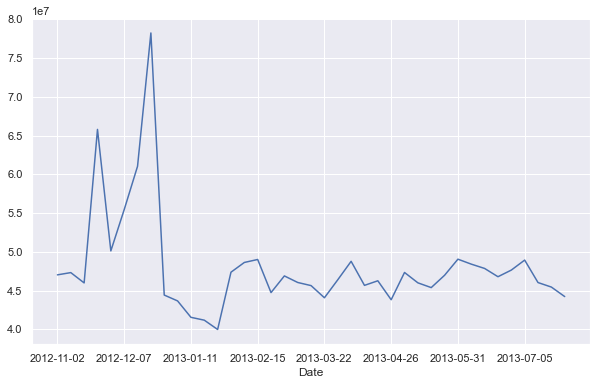

In [313]:
output.groupby('Date').Sales.sum().plot()

<AxesSubplot:xlabel='Date'>

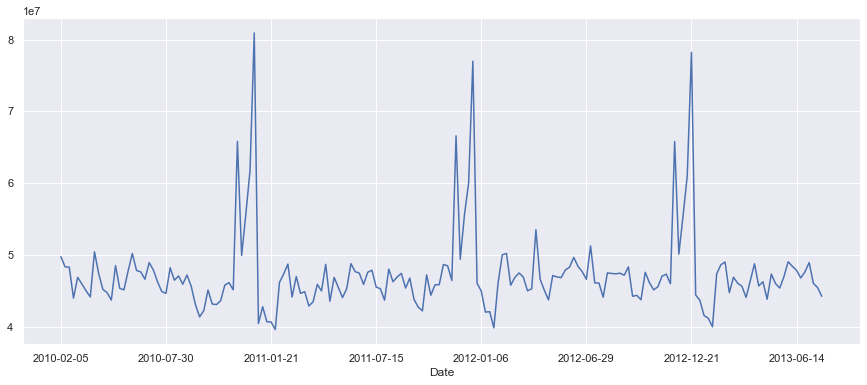

In [321]:
train1 = train.drop('IsHoliday',axis=1)
output.rename({'Sales': 'Weekly_Sales'}, axis=1, inplace=True)
combined = pd.concat([train1,output])
combined.groupby('Date').Weekly_Sales.sum().plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

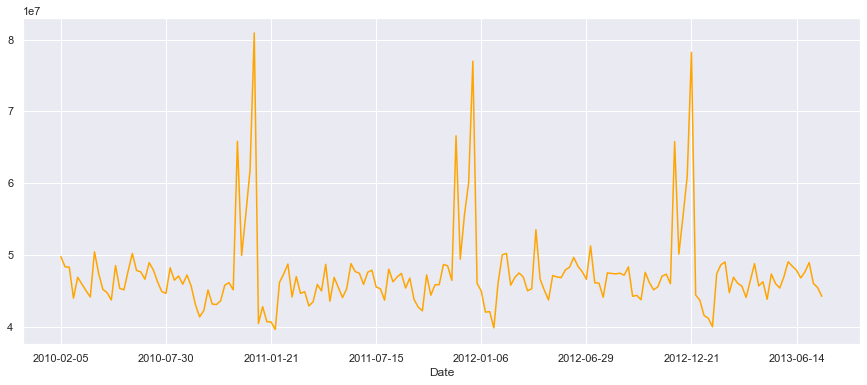

In [324]:
train1 = train.drop('IsHoliday',axis=1)
output.rename({'Sales': 'Weekly_Sales'}, axis=1, inplace=True)
combined = pd.concat([train1,output])
combined.groupby('Date').Weekly_Sales.sum().plot(figsize=(15,6),c='Orange')